In [6]:
# Neccesary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openmm import app
import openmm as mm
from openmm import LocalEnergyMinimizer
from openmm import unit
import sys
import mdtraj
import mdtraj.reporters
import numpy as np

### Question 1b - Plotting the Energy vs Time of Simulation Output

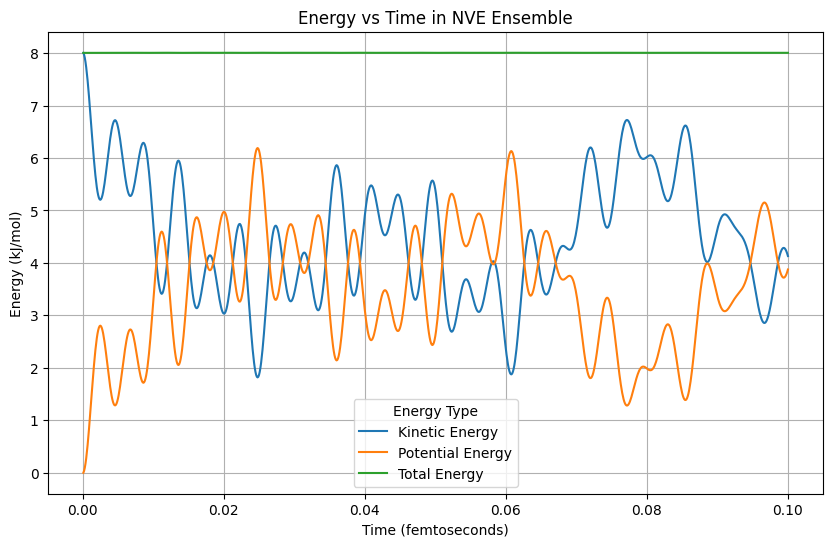

In [4]:
ke = pd.read_csv('KE.NVE', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
pe = pd.read_csv('PE.NVE', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
te = pd.read_csv('TE.NVE', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
ke['Type'] = 'Kinetic Energy'
pe['Type'] = 'Potential Energy'
te['Type'] = 'Total Energy'
energy_data = pd.concat([ke, pe, te])
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_data, x='Time (femtoseconds)', y='Energy (kJ/mol)', hue='Type')
plt.title('Energy vs Time in NVE Ensemble')
plt.xlabel('Time (femtoseconds)')
plt.ylabel('Energy (kJ/mol)')
plt.legend(title='Energy Type')
plt.grid(True)
plt.savefig('q1b.png')
plt.show()

In [4]:
# I customed the simulation script to have the file gen as a function for a few reasons.
from water2_pandas import generate_energy_files

df_list = []
for i in [0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1]:
    df = generate_energy_files(steps = 1000, skipSteps = 1, Temperature=150., 
                          dt = i * unit.femtoseconds, ensemble='NVE', output_df=True)
    df_list.append(df.groupby('Type')['Energy (kJ/mol)'].agg(['mean', 'var']).reset_index().rename(
        columns={'mean':'Mean Energy (kJ/mol)', 'var':'Variance of Energy (kJ/mol)'}
    ))

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
0.1%	1	-28.189448233147655	165.279235687072	0	--
0.2%	2	-28.18944822674231	165.27923557998028	0.00252	0:03
0.3%	3	-28.18944821033706	165.27923533028485	0.00272	0:03
0.4%	4	-28.18944818393195	165.27923490371782	0.00293	0:02
0.5%	5	-28.189448147526978	165.2792343389253	0.00292	0:02
0.6%	6	-28.18944810112218	165.27923360797885	0.00277	0:03
0.7%	7	-28.18944804471815	165.2792327046351	0.0028	0:03
0.8%	8	-28.189447978314433	165.27923163115528	0.00284	0:03
0.9%	9	-28.189447901911688	165.27923040594303	0.00292	0:02
1.0%	10	-28.18944781550952	165.27922902064432	0.00288	0:02
1.1%	11	-28.189447719108475	165.2792274725867	0.0029	0:02
1.2%	12	-28.189447612708356	165.27922576457007	0.00283	0:03
1.3%	13	-28.18944749630973	165.27922389272365	0.00284	0:03
1.4%	14	-28.189447369912113	165.27922186441995	0.00288	0:02
1.5%	15	-28.189447233516297	165.27921969681202	0.00289	0:02
1.6%	16	-28.189447087121717

In [6]:
different_step_size = pd.concat(df_list, ignore_index=True)
different_step_size

,Type,Mean Energy (kJ/mol),Variance of Energy (kJ/mol)
0,Kinetic Energy,10.304902,2.149731e-06
1,Potential Energy,0.001657,2.198482e-06
2,Total Energy,10.306559,3.026187e-12
3,Kinetic Energy,7.043081,1.177452e-02
4,Potential Energy,0.122647,1.177385e-02
5,Total Energy,7.165729,9.104051e-13
6,Kinetic Energy,17.510872,5.697585e-01
7,Potential Energy,0.872298,5.697575e-01
8,Total Energy,18.383169,2.716649e-12
9,Kinetic Energy,5.178663,2.316216e+00


In [16]:
from water2_pandas import generate_energy_files

df_list = []
for i in [2, 5, 10, 50, 100, 500, 1000]:
    df = generate_energy_files(steps = i, skipSteps = 1, Temperature=150., 
                          dt = 0.1 * unit.femtoseconds, ensemble='NVE', output_df=True)
    df_list.append(df.groupby('Type')['Energy (kJ/mol)'].agg(['mean', 'var']).reset_index().rename(
        columns={'mean':'Mean Energy (kJ/mol)', 'var':'Variance of Energy (kJ/mol)'}
    ))

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
50.0%	1	-28.17609029550686	187.9649482085326	0	--
100.0%	2	-28.136223856732126	187.32624018465543	2.23	0:00
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
20.0%	1	-28.160128278106033	250.75578458276337	0	--
40.0%	2	-28.072599737513947	249.35346523857584	1.97	0:00
60.0%	3	-27.92824177773268	247.0408431441624	1.67	0:00
80.0%	4	-27.72946115499183	243.8564690733221	1.74	0:00
100.0%	5	-27.479647371636116	239.85463489168288	1.8	0:00
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
10.0%	1	-28.157714230560906	444.14064473849845	0	--
20.0%	2	-28.0629921506344	442.62309429102436	1.87	0:00
30.0%	3	-27.906756675182464	440.1201228604859	1.75	0:00
40.0%	4	-27.691506712821713	436.671756628227	1.79	0:00
50.0%	5	-27.420718474501573	432.33367636282367	1.81	0:00
60.0%	6	-27.098780882972637	4

In [17]:
different_step_count = pd.concat(df_list, ignore_index=True)
different_step_count

,Type,Mean Energy (kJ/mol),Variance of Energy (kJ/mol)
0,Kinetic Energy,11.701292,7.931847e-04
1,Potential Energy,0.019933,7.946288e-04
2,Total Energy,11.721225,6.566552e-10
3,Kinetic Energy,15.350924,7.500910e-02
4,Potential Energy,0.286112,7.516470e-02
5,Total Energy,15.637036,8.061375e-08
6,Kinetic Energy,26.608166,9.098677e-01
7,Potential Energy,1.088851,9.116944e-01
8,Total Energy,27.697018,9.135235e-07
9,Kinetic Energy,11.404790,2.439106e-01


## Question 1d) Oxygen Distance

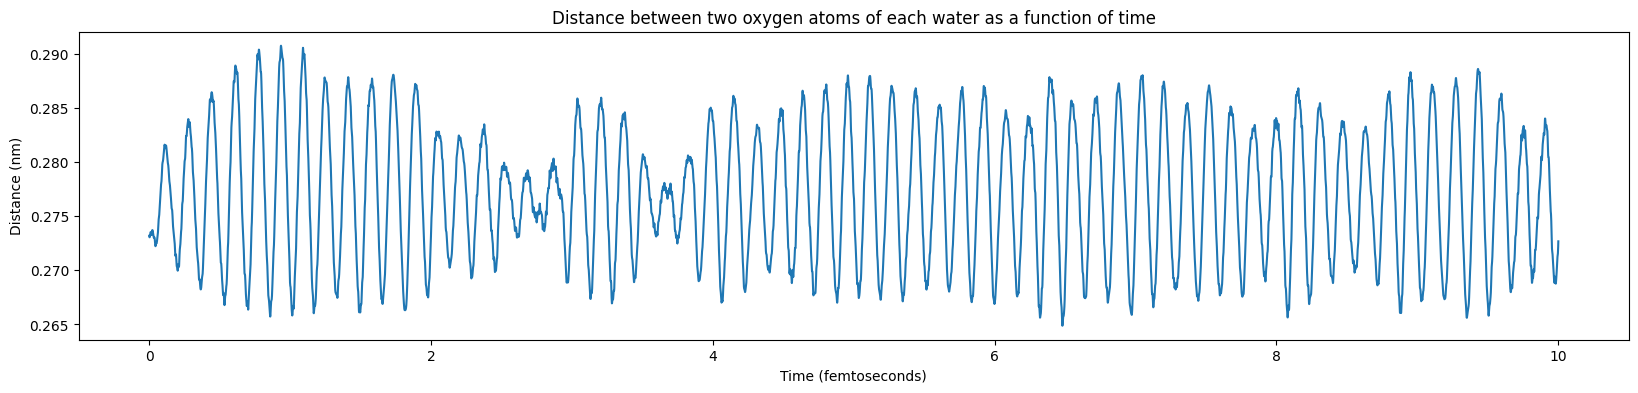

In [16]:
roo = pd.read_csv('rOO.NVE', names=['Time (femtoseconds)', 'Distance (nm)'], header=None, sep=r'\s+')
plt.figure(figsize=(20, 4))
sns.lineplot(data=roo, x='Time (femtoseconds)', y='Distance (nm)')
plt.title('Distance between two oxygen atoms of each water as a function of time')
plt.show()

In [18]:
roo['Distance (nm)'].var()

3.9125565393168247e-05

In [ ]:
roo.groupby('Type')['Energy (kJ/mol)'].agg(['mean', 'var']).reset_index().rename(
        columns={'mean':'Mean Energy (kJ/mol)', 'var':'Variance of Energy (kJ/mol)'}
    ))

## Question 2

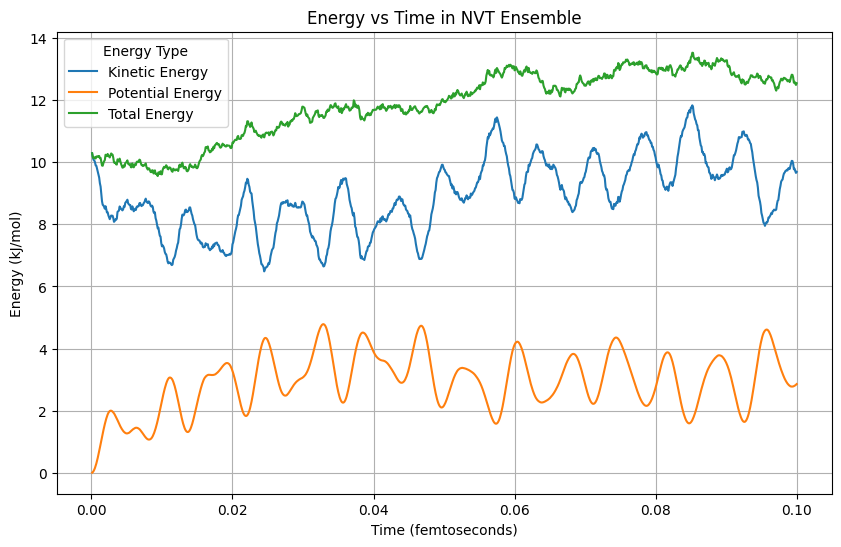

In [20]:
ke = pd.read_csv('KE.NVT', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
pe = pd.read_csv('PE.NVT', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
te = pd.read_csv('TE.NVT', names=['Time (femtoseconds)', 'Energy (kJ/mol)'], header=None, sep=r'\s+')
ke['Type'] = 'Kinetic Energy'
pe['Type'] = 'Potential Energy'
te['Type'] = 'Total Energy'
energy_data = pd.concat([ke, pe, te])
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_data, x='Time (femtoseconds)', y='Energy (kJ/mol)', hue='Type')
plt.title('Energy vs Time in NVT Ensemble')
plt.xlabel('Time (femtoseconds)')
plt.ylabel('Energy (kJ/mol)')
plt.legend(title='Energy Type')
plt.grid(True)
plt.savefig('q2b.png')
plt.show()

In [21]:
from water2_pandas import generate_energy_files

df_list = []
for i in [2, 5, 10, 50, 100, 500, 1000]:
    df = generate_energy_files(steps = i, skipSteps = 1, Temperature=150., 
                          dt = 0.1 * unit.femtoseconds, ensemble='NVT', output_df=True)
    df_list.append(df.groupby('Type')['Energy (kJ/mol)'].agg(['mean', 'var']).reset_index().rename(
        columns={'mean':'Mean Energy (kJ/mol)', 'var':'Variance of Energy (kJ/mol)'}
    ))

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
50.0%	1	-28.16699366960575	137.19830561573357	0	--
100.0%	2	-28.099355926317962	136.54781565125225	3.05	0:00
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
20.0%	1	-28.169200901002405	174.69777408863087	0	--
40.0%	2	-28.109299462062367	172.44976318888126	2.13	0:00
60.0%	3	-28.01107312306661	170.88580735308028	2.14	0:00
80.0%	4	-27.876390405038066	168.29136703164596	1.86	0:00
100.0%	5	-27.708729632674643	164.12045282725998	1.8	0:00
#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
10.0%	1	-28.16582470413411	165.76316537612936	0	--
20.0%	2	-28.09582947647344	164.56914331991862	2.57	0:00
30.0%	3	-27.980481622078244	162.88871174976578	2.26	0:00
40.0%	4	-27.82200922481109	160.09128040825038	2.5	0:00
50.0%	5	-27.62427543730472	156.0777365651029	2.49	0:00
60.0%	6	-27.38929534415473

In [22]:
different_step_count = pd.concat(df_list, ignore_index=True)
different_step_count

,Type,Mean Energy (kJ/mol),Variance of Energy (kJ/mol)
0,Kinetic Energy,8.535194,0.000823
1,Potential Energy,0.033819,0.002287
2,Total Energy,8.569014,0.000367
3,Kinetic Energy,10.606492,0.064457
4,Potential Energy,0.194262,0.034419
5,Total Energy,10.800755,0.005110
6,Kinetic Energy,9.493747,0.525914
7,Potential Energy,0.794050,0.479962
8,Total Energy,10.287797,0.002547
9,Kinetic Energy,8.380745,0.605044


In [23]:
from water2_pandas import generate_energy_files

df_list = []
for i in [0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1]:
    df = generate_energy_files(steps = 1000, skipSteps = 1, Temperature=150., 
                          dt = i * unit.femtoseconds, ensemble='NVE', output_df=True)
    df_list.append(df.groupby('Type')['Energy (kJ/mol)'].agg(['mean', 'var']).reset_index().rename(
        columns={'mean':'Mean Energy (kJ/mol)', 'var':'Variance of Energy (kJ/mol)'}
    ))

#"Progress (%)"	"Step"	"Potential Energy (kJ/mole)"	"Temperature (K)"	"Speed (ns/day)"	"Time Remaining"
0.1%	1	-28.18944821950234	106.69992836029702	0	--
0.2%	2	-28.189448177212586	106.6999276758883	0.0021	0:04
0.3%	3	-28.189448102683972	106.69992648055188	0.00222	0:03
0.4%	4	-28.18944799591565	106.69992476139845	0.00227	0:03
0.5%	5	-28.189447856908377	106.69992251909287	0.00236	0:03
0.6%	6	-28.1894476856615	106.69991977944856	0.00244	0:03
0.7%	7	-28.189447482175087	106.69991651962782	0.00242	0:03
0.8%	8	-28.189447246449067	106.69991273556181	0.00243	0:03
0.9%	9	-28.189446978483442	106.69990844431766	0.00249	0:03
1.0%	10	-28.189446678278237	106.69990363787953	0.00252	0:03
1.1%	11	-28.18944634583341	106.69989831074183	0.00253	0:03
1.2%	12	-28.189445981148467	106.6998924633403	0.00254	0:03
1.3%	13	-28.189445584223684	106.69988609234376	0.00254	0:03
1.4%	14	-28.189445155059023	106.69987921042913	0.00257	0:03
1.5%	15	-28.189444693654416	106.69987180243577	0.00261	0:03
1.6%	16	-28.189444200

In [24]:
different_step_size = pd.concat(df_list, ignore_index=True)
different_step_size

,Type,Mean Energy (kJ/mol),Variance of Energy (kJ/mol)
0,Kinetic Energy,6.648269,2.310278e-05
1,Potential Energy,0.005375,2.311273e-05
2,Total Energy,6.653643,1.488968e-12
3,Kinetic Energy,9.541514,5.037704e-03
4,Potential Energy,0.079937,5.037650e-03
5,Total Energy,9.621451,1.158035e-12
6,Kinetic Energy,15.453273,6.976535e-01
7,Potential Energy,0.964015,6.976711e-01
8,Total Energy,16.417288,1.303700e-12
9,Kinetic Energy,2.352875,2.981630e-01
